**After Mounting from the drive, the necessary libraries are imported.**


---



In [4]:
import pandas as pd
import numpy as np
import os
for dirname, _, filenames in os.walk('drive/MyDrive/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

drive/MyDrive/kaggle/input/sign_mnist_test.csv
drive/MyDrive/kaggle/input/amer_sign2.png
drive/MyDrive/kaggle/input/amer_sign3.png
drive/MyDrive/kaggle/input/american_sign_language.PNG
drive/MyDrive/kaggle/input/sign_mnist_train.csv
drive/MyDrive/kaggle/input/sign_mnist_test/sign_mnist_test.csv
drive/MyDrive/kaggle/input/sign_mnist_train/sign_mnist_train.csv


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau

In [10]:
train_df = pd.read_csv("drive/MyDrive/kaggle/input/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("drive/MyDrive/kaggle/input/sign_mnist_test/sign_mnist_test.csv")
test = pd.read_csv("drive/MyDrive/kaggle/input/sign_mnist_test/sign_mnist_test.csv")
y = test['label']
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


**These are the training labels which have the correctly lablled Sign language symbols.**


---



<Axes: ylabel='count'>

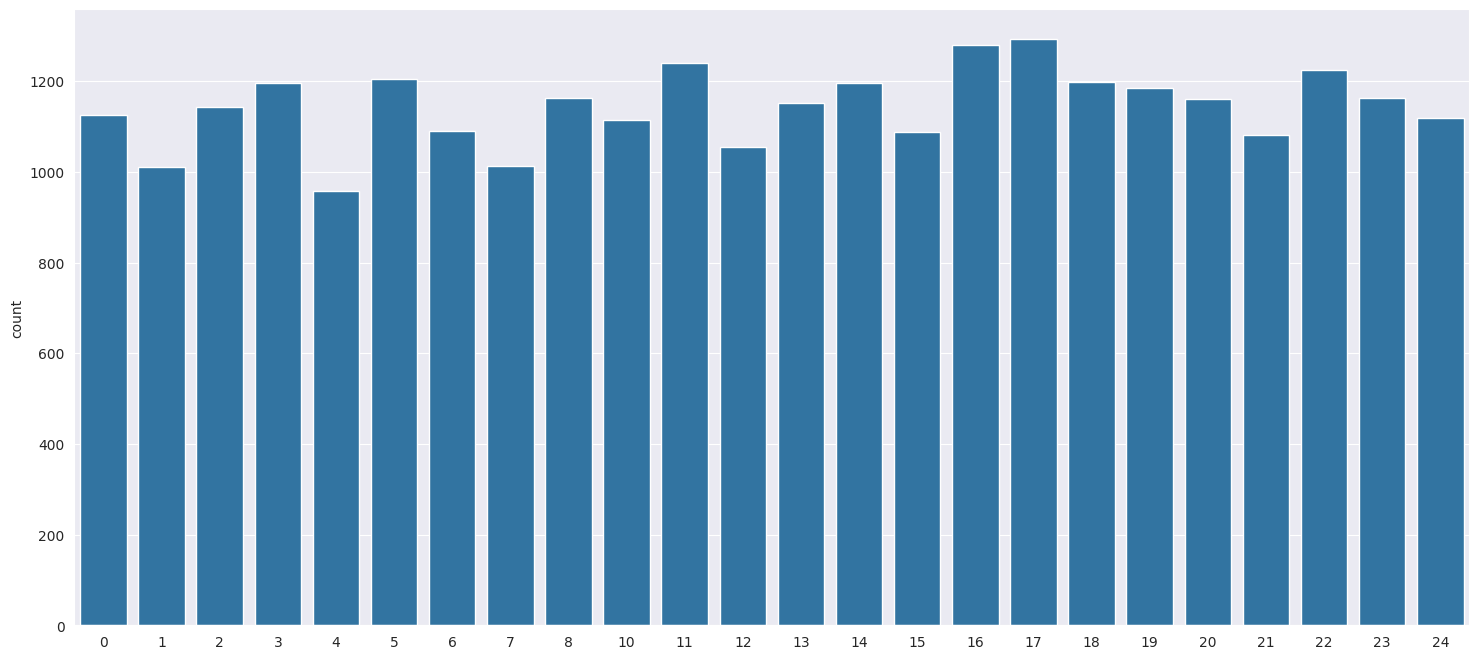

In [15]:
labels = train_df['label'].values
plt.figure(figsize = (18,8))
sns.countplot(x =labels)

In [16]:
y_train = train_df['label']
y_test = test_df['label']
del train_df['label']
del test_df['label']

**These are sample training images**


---



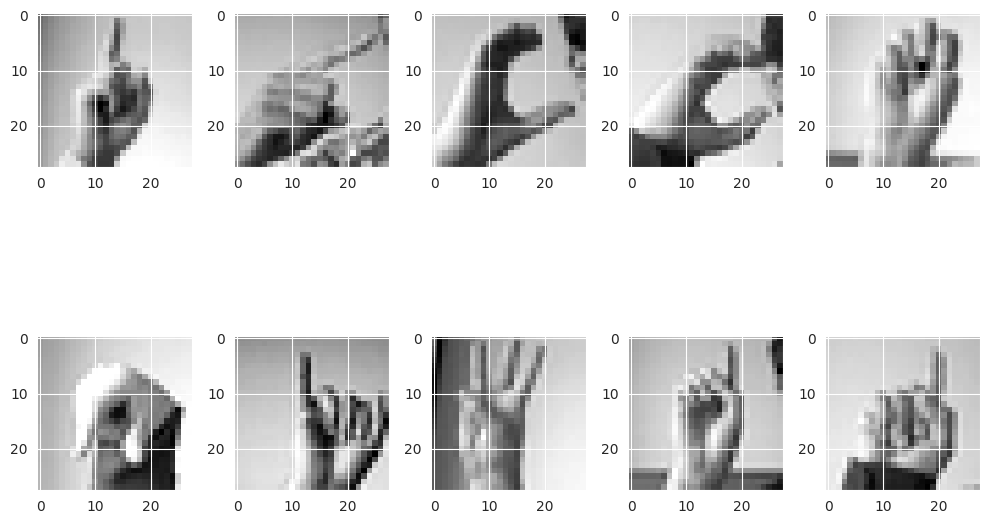

In [18]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)
x_train = train_df.values
x_test = test_df.values
x_train = x_train / 255
x_test = x_test / 255
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
f, ax = plt.subplots(2,5)
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

**Data Augmentation is done here**


---



In [19]:
# Data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [21]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 75)        750       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 75)        300       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 75)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 50)        33800     
                                                                 
 dropout (Dropout)           (None, 14, 14, 50)        0         
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 50)        2

**The Models are fitted here with epoch size as 10.**


---



In [22]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 10 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

Epoch 1/10
215/215 [==============================] - 154s 696ms/step - loss: 1.1072 - accuracy: 0.6557 - val_loss: 3.5086 - val_accuracy: 0.1104 - lr: 0.0010
Epoch 2/10
215/215 [==============================] - 116s 541ms/step - loss: 0.2395 - accuracy: 0.9220 - val_loss: 1.2506 - val_accuracy: 0.6111 - lr: 0.0010
Epoch 3/10
215/215 [==============================] - 114s 532ms/step - loss: 0.1119 - accuracy: 0.9635 - val_loss: 0.4405 - val_accuracy: 0.8314 - lr: 0.0010
Epoch 4/10
215/215 [==============================] - 116s 539ms/step - loss: 0.0662 - accuracy: 0.9790 - val_loss: 0.0318 - val_accuracy: 0.9891 - lr: 0.0010
Epoch 5/10
215/215 [==============================] - 109s 507ms/step - loss: 0.0516 - accuracy: 0.9837 - val_loss: 0.0502 - val_accuracy: 0.9830 - lr: 0.0010
Epoch 6/10
215/215 [==============================] - ETA: 0s - loss: 0.0366 - accuracy: 0.9879
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
215/215 [========================

**ACCURACY IS DISPLAYED HERE:**


---



In [55]:
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

225/225 [==============================] - 6s 25ms/step - loss: 0.0153 - accuracy: 0.9961
Accuracy of the model is -  99.60959553718567 %


**TRAINING, VALIDATION AND TESTING ACCURACY AND LOSS IS VISUALIZED**


---



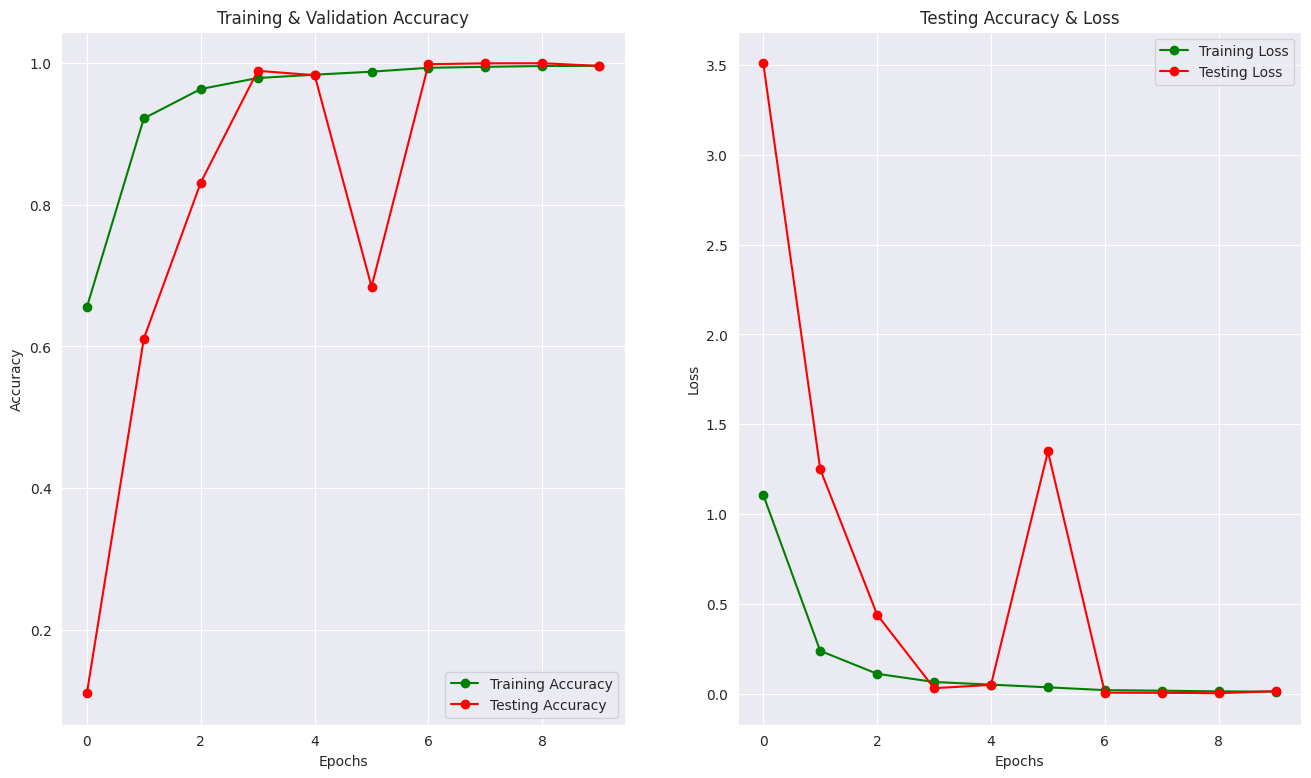

In [56]:
epochs = [i for i in range(10)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [32]:
# predictions = model.predict(x_test)
predict_x=model.predict(x_test)
predictions=np.argmax(predict_x,axis=1)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
predictions[:5]

225/225 [==============================] - 10s 42ms/step


array([ 6,  5, 10,  0,  3])

**REPORT IS GENERATED HERE WITH PRECISION, RECALL, F1-SCORE AND SUPPORT**


---



In [33]:
classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y, predictions, target_names = classes))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00       331
     Class 1       1.00      1.00      1.00       432
     Class 2       1.00      1.00      1.00       310
     Class 3       1.00      1.00      1.00       245
     Class 4       1.00      0.99      0.99       498
     Class 5       0.93      1.00      0.96       247
     Class 6       1.00      1.00      1.00       348
     Class 7       1.00      1.00      1.00       436
     Class 8       1.00      1.00      1.00       288
    Class 10       1.00      0.99      1.00       331
    Class 11       1.00      1.00      1.00       209
    Class 12       0.99      1.00      1.00       394
    Class 13       1.00      1.00      1.00       291
    Class 14       1.00      1.00      1.00       246
    Class 15       1.00      1.00      1.00       347
    Class 16       1.00      1.00      1.00       164
    Class 17       0.99      1.00      1.00       144
    Class 18       0.99    

**CONFUSION MATRIX IS GENERATED HERE TO SHOW THE CORRECT AND INCORRECT PREDICTIONS**


---

<Axes: >

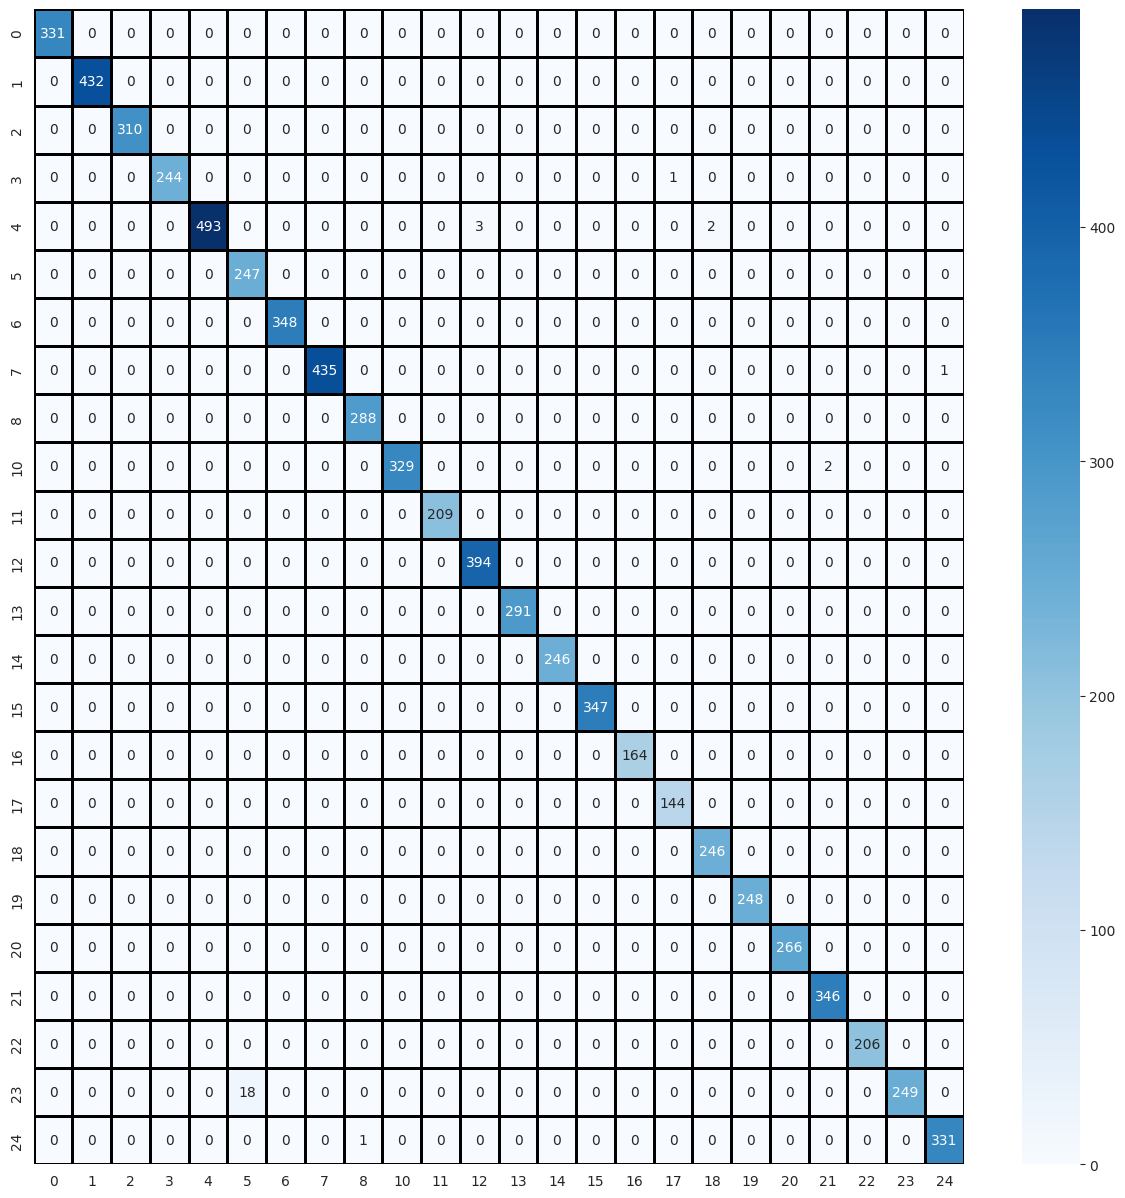

In [57]:
cm = confusion_matrix(y,predictions)
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

A FEW OF THE CORRECTLY VISUALIZED PREDICTIONS ARE SHOWN HERE


---



<ipython-input-58-a7832b5e0a87>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,2,i+1)


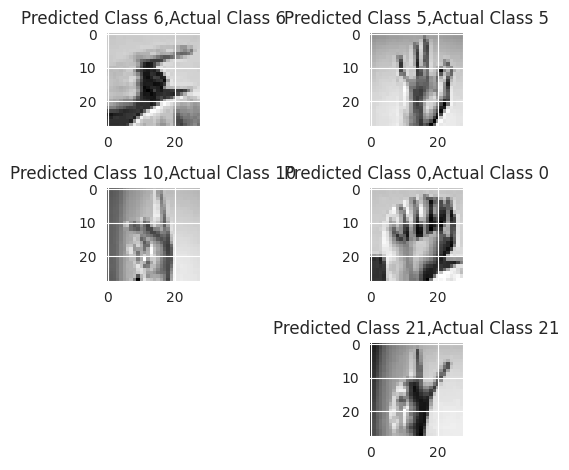

In [58]:
# I am getting a sample of the correctly predicted images and visualising it
correct = np.where(predictions == y)[0]
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.imshow(x_test[c].reshape(28,28), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y[c]))
    plt.tight_layout()
    i += 1
